![IGNlogo](ignlogo.png)

# Proyecto de Estadística
## Análisis estadístico de las puntuaciones de videojuegos en IGN: Tendencias y comparaciones entre géneros y plataformas

### Introducción

La industria de los videojuegos ha crecido considerablemente en las últimas décadas, convirtiéndose en un pilar del entretenimiento global. Este proyecto analiza un conjunto de datos extraídos de IGN, una de las plataformas más influyentes en reseñas y puntuaciones de videojuegos. Los datos incluyen información como puntuaciones, géneros, plataformas y fechas de lanzamiento.

El objetivo principal es identificar patrones y tendencias en las valoraciones de videojuegos, así como realizar comparaciones entre grupos. Para ello, se aplicarán métodos estadísticos para estimar parámetros, verificar hipótesis y explorar posibles relaciones entre variables, como el género del videojuego, la plataforma y las puntuaciones otorgadas.

Este análisis no solo permitirá extraer conclusiones relevantes sobre las valoraciones en IGN, sino también aplicar de manera práctica los conceptos estudiados en la asignatura.

### Población y Muestra

La **población** de este estudio está compuesta por todos los videojuegos reseñados en la plataforma IGN, con sus respectivas puntuaciones, géneros, plataformas y fechas de lanzamiento. Sin embargo, debido a la limitación en la disponibilidad y el tiempo, se ha seleccionado una **muestra representativa** de 18625 títulos que incluye un subconjunto de estos videojuegos, con un enfoque particular en aquellos con datos completos sobre sus puntuaciones y características.

Esta muestra permite realizar análisis detallados sobre las distribuciones de puntuaciones por género, plataforma, y otros factores, asegurando que los resultados sean lo suficientemente robustos y significativos para generalizar sobre las tendencias observadas en la plataforma IGN.

### Análisis descriptivo
#### Distribución de puntuaciones (score):
Al analizar las puntuaciones de los videojuegos, no solo nos interesa conocer las calificaciones más altas o más bajas, sino cómo se distribuyen en su totalidad. Exploraremos la distribución de las puntuaciones utilizando un histograma, junto con medidas clave como la media, la mediana, la desviación estándar y el rango. Este enfoque nos ofrece una visión más profunda de la variabilidad y la concentración de las calificaciones, permitiéndonos detectar posibles tendencias o sesgos en la evaluación de los juegos. Con esta información, podremos entender mejor cómo los videojuegos son percibidos en términos de calidad y qué tan dispersas o consistentes son las opiniones.

Media: 6.95
Mediana: 7.30
Desviación estándar: 1.71
Rango: 9.50


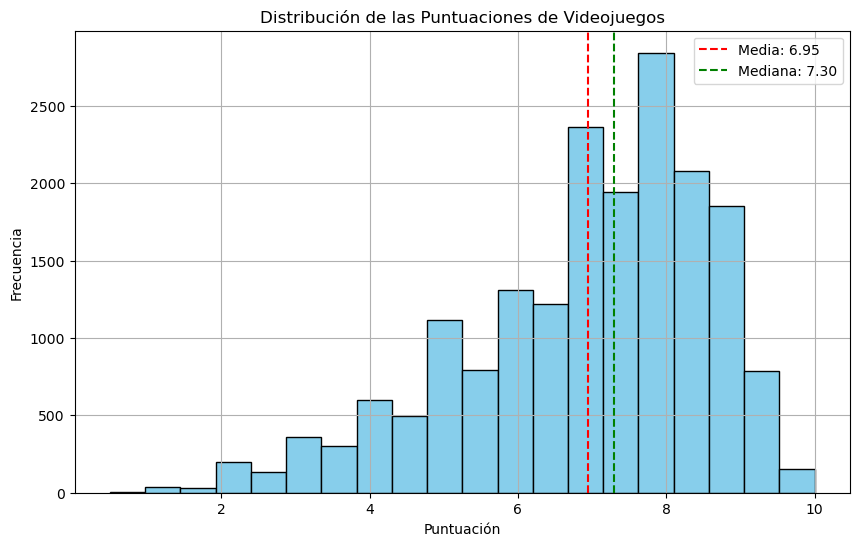

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/ign.csv")

scores = data['score']

media = scores.mean()
mediana = scores.median()
desviacion_std = scores.std()
rango = scores.max() - scores.min()

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Desviación estándar: {desviacion_std:.2f}")
print(f"Rango: {rango:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de las Puntuaciones de Videojuegos")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f"Media: {media:.2f}")
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=1.5, label=f"Mediana: {mediana:.2f}")
plt.legend()
plt.grid(True)
plt.show()


La mayoría de los videojuegos evaluados en IGN obtienen puntuaciones buenas (cercanas a 7), pero la presencia de títulos con valoraciones bajas influye en reducir ligeramente la media. Esto refleja la diversidad en la calidad de los videojuegos, donde coexisten tanto juegos sobresalientes como propuestas menos exitosas. Esta variabilidad puede estar relacionada con factores como el género, la plataforma o las expectativas del público.

#### Distribución de puntuaciones por género:
Cada género de videojuego tiene su propio universo, con características únicas que atraen a distintos tipos de jugadores. Pero, ¿cómo se reflejan estas diferencias en las calificaciones de los juegos? Utilizaremos un gráfico de caja (boxplot) para analizar la dispersión de las puntuaciones de los videojuegos en distintos géneros. El objetivo es observar cómo varían las calificaciones dentro de cada categoría, identificar posibles valores atípicos y descubrir las tendencias que marcan la percepción de calidad en cada tipo de juego. Este análisis nos ayudará a entender mejor lo que los jugadores valoran en cada género y qué expectativas tienen sobre la calidad de los títulos dentro de estas categorías.

/tmp/ipykernel_632351/357133093.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='score', data=scores_by_genre_top, palette="viridis", hue=None)


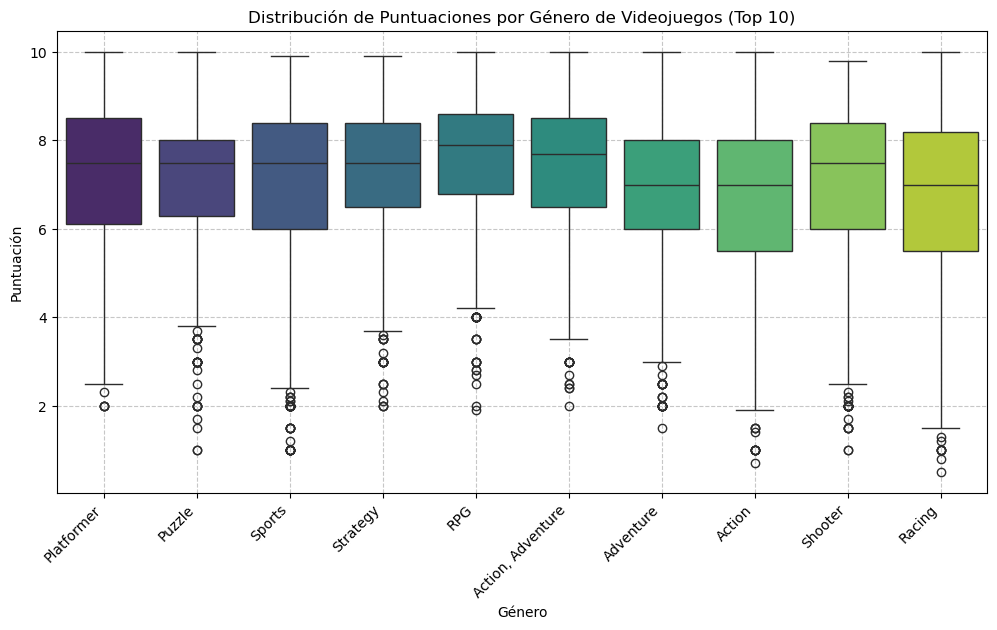

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

scores_by_genre = data[['score', 'genre']]

top_genres = scores_by_genre['genre'].value_counts().head(10).index
scores_by_genre_top = scores_by_genre[scores_by_genre['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='score', data=scores_by_genre_top, palette="viridis", hue=None)

plt.title("Distribución de Puntuaciones por Género de Videojuegos (Top 10)")
plt.xlabel("Género")
plt.ylabel("Puntuación")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


Los géneros con cajas más grandes tienen una mayor variabilidad en las puntuaciones (lo que indica críticas más divididas para ese género), análogamente los géneros con cajas más pequeñas tienen menor dispersión indicando puntuaciones más consistentes. Podemos observar que en la mayoría de los géneros los outliers se inclinan hacia las notas más bajas, indicando que en casi todos los géneros hay juegos con notas muy negativas.

De manera general se puede observar que la mediana en el género de los **RPG** se encuentra más hacia las notas altas apuntando a que estos juegos tienen a recibir más notas en este rango (además de oscilar cercano a los 8 puntos).

Por lo que podemos observar que estos juegos en general son de mayor calidad.

#### Distribución de puntuaciones por plataforma:
A lo largo de los años, las plataformas de videojuegos han evolucionado, cada una con sus particularidades y su propia base de jugadores. Pero, ¿cómo afecta el sistema en el que un juego está disponible a su percepción y calificación? En esta sección, analizaremos cómo las puntuaciones promedio de los videojuegos varían según la plataforma en la que se encuentren. A través de este análisis, exploraremos si las diferencias en las calificaciones reflejan las características específicas de cada sistema o incluso la calidad de los títulos exclusivos. Comprender estas variaciones nos permitirá identificar tendencias clave en el mercado y cómo se percibe la calidad de los juegos en las principales plataformas.


/tmp/ipykernel_632351/3470822385.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_avg_scores.index, y=platform_avg_scores.values, palette="viridis")


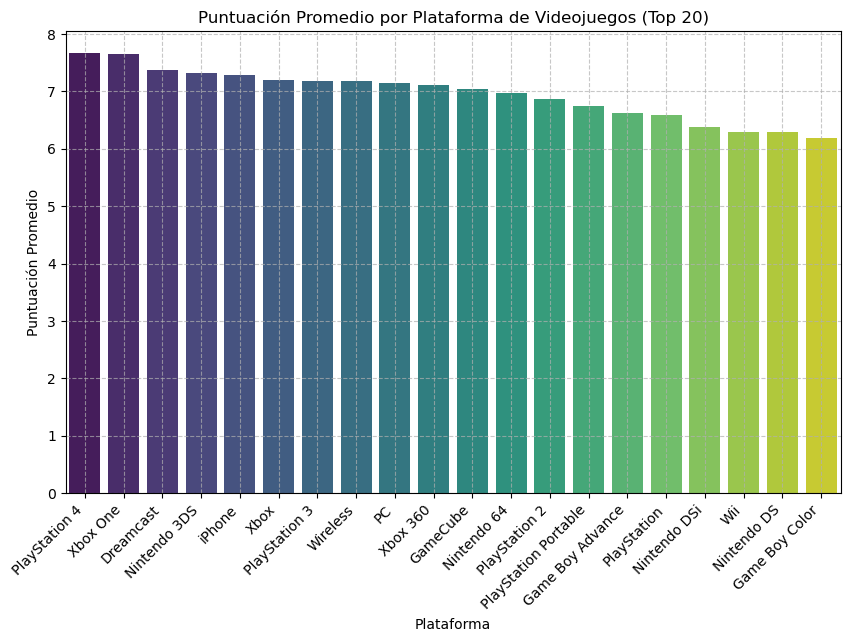

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

scores_by_platform = data[['score', 'platform']]

top_platforms = scores_by_platform['platform'].value_counts().head(20).index
scores_by_platform_top = scores_by_platform[scores_by_platform['platform'].isin(top_platforms)]

platform_avg_scores = scores_by_platform_top.groupby('platform')['score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
sns.barplot(x=platform_avg_scores.index, y=platform_avg_scores.values, palette="viridis")

plt.title("Puntuación Promedio por Plataforma de Videojuegos (Top 20)")
plt.xlabel("Plataforma")
plt.ylabel("Puntuación Promedio")
plt.xticks(rotation=45, ha="right")  
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


A partir del gráfico anterior, se puede observar que, aunque los juegos en PlayStation 4 y Xbox One reciben mejores críticas, las puntuaciones promedio de los videojuegos, independientemente de la plataforma, son bastante similares. Para entender las posibles razones de esta tendencia, realizaremos el siguiente análisis:

/tmp/ipykernel_632351/3566915159.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=game_frequency.index, y=game_frequency.values, palette="viridis")


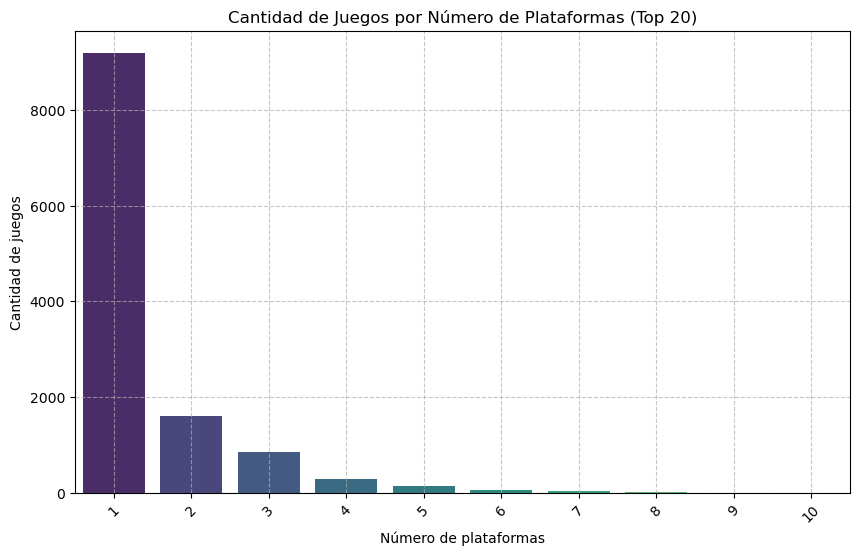

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

scores_by_platform = data[['title', 'platform']]

top_platforms = scores_by_platform['platform'].value_counts().head(20).index
filtered_data = scores_by_platform[scores_by_platform['platform'].isin(top_platforms)]

game_platform_count = filtered_data.groupby('title')['platform'].nunique()

game_frequency = game_platform_count.value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=game_frequency.index, y=game_frequency.values, palette="viridis")

plt.title("Cantidad de Juegos por Número de Plataformas (Top 20)")
plt.xlabel("Número de plataformas")
plt.ylabel("Cantidad de juegos")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


Pudiéramos pensar que las plataformas obtenían notas promedio similares debido a que una gran cantidad de juegos se publicaban en múltiples plataformas, pero atendiendo al gráfico anterior podemos notar, que significativamente la mayoría de los videojuegos se publican en una sola plataforma.

Esto sugiere que las plataformas podrían estar ofreciendo una experiencia similar en cuanto a la calidad de los títulos disponibles, lo que podría deberse a una alineación de estándares de desarrollo o a una falta de innovación significativa entre las plataformas.

#### Análisis de frecuencia de géneros y plataformas:
En esta sección, exploramos qué géneros y plataformas dominan la industria de los videojuegos. A través de gráficos de barras y tablas de frecuencia, analizaremos los géneros más populares y las plataformas con mayor cantidad de títulos disponibles. Este análisis nos ofrece una visión clara de las preferencias del mercado, revelando qué tipos de juegos y qué sistemas concentran la mayor parte de la oferta. Así, podremos identificar las tendencias clave que definen la industria en la actualidad.

/tmp/ipykernel_632351/606418776.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")


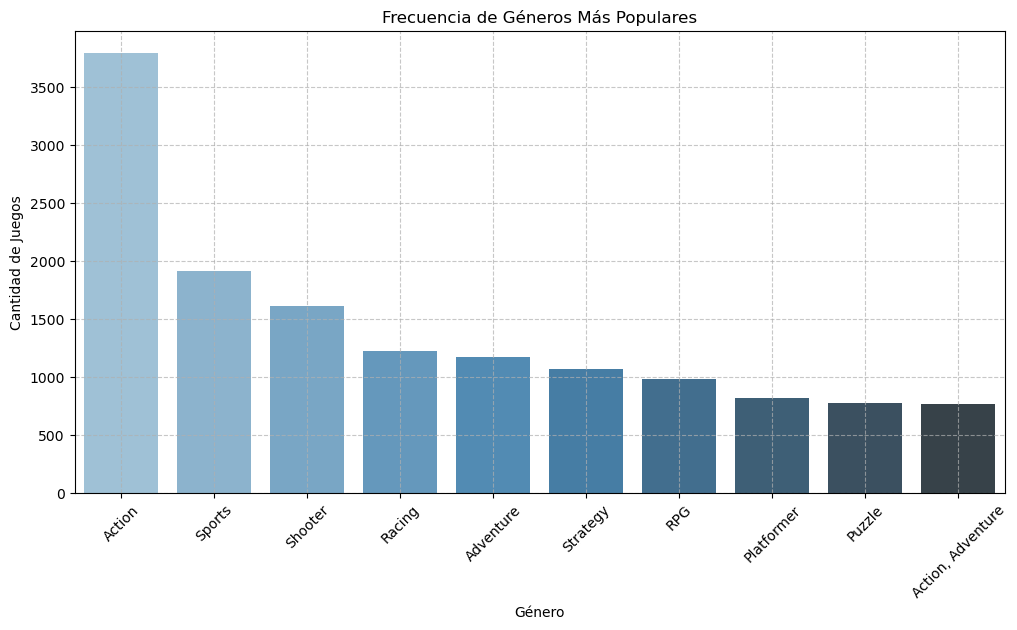

/tmp/ipykernel_632351/606418776.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")


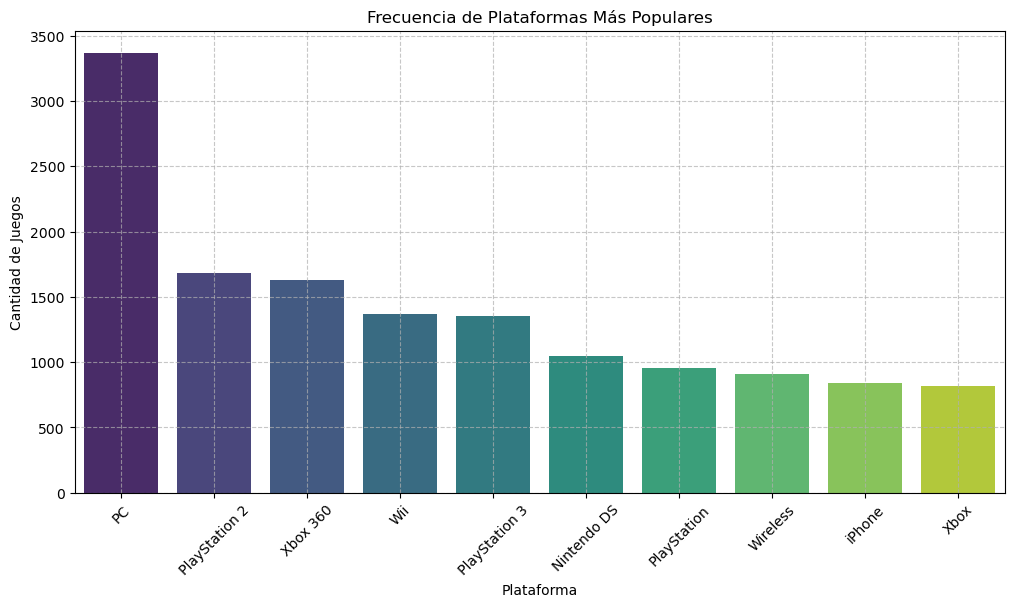

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

genre_counts = data['genre'].value_counts().head(10) 

platform_counts = data['platform'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")
plt.title("Frecuencia de Géneros Más Populares")
plt.xlabel("Género")
plt.ylabel("Cantidad de Juegos")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")
plt.title("Frecuencia de Plataformas Más Populares")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de Juegos")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### Tendencia temporal:
Imagina un viaje a través del tiempo, donde cada año refleja una nueva etapa en la evolución de los videojuegos. Desde los primeros píxeles de los años 70 hasta los vastos mundos abiertos de la actualidad, la industria de los videojuegos ha recorrido un largo camino. Pero, ¿cómo ha cambiado este camino a lo largo de los años? ¿Cómo ha crecido la cantidad de lanzamientos y cómo ha fluctuado la calidad de los juegos que conocemos y amamos?

En esta sección, nos adentramos en la evolución temporal de los lanzamientos de videojuegos y sus puntuaciones promedio a lo largo de los años. Usaremos gráficos de línea para observar cómo ha aumentado o disminuido la cantidad de juegos lanzados cada año, y cómo las puntuaciones que los críticos han otorgado a estos juegos han variado con el tiempo.

A través de este análisis, descubriremos patrones, picos, y caídas que nos ayudarán a entender mejor el crecimiento de la industria. También veremos cómo los cambios tecnológicos, las innovaciones en las consolas y los giros en la cultura de los videojuegos han impactado tanto en la cantidad como en la calidad de los lanzamientos. Este recorrido nos permitirá no solo entender cómo los videojuegos han evolucionado, sino también cómo la percepción de su calidad ha sido influenciada por las circunstancias de cada época.

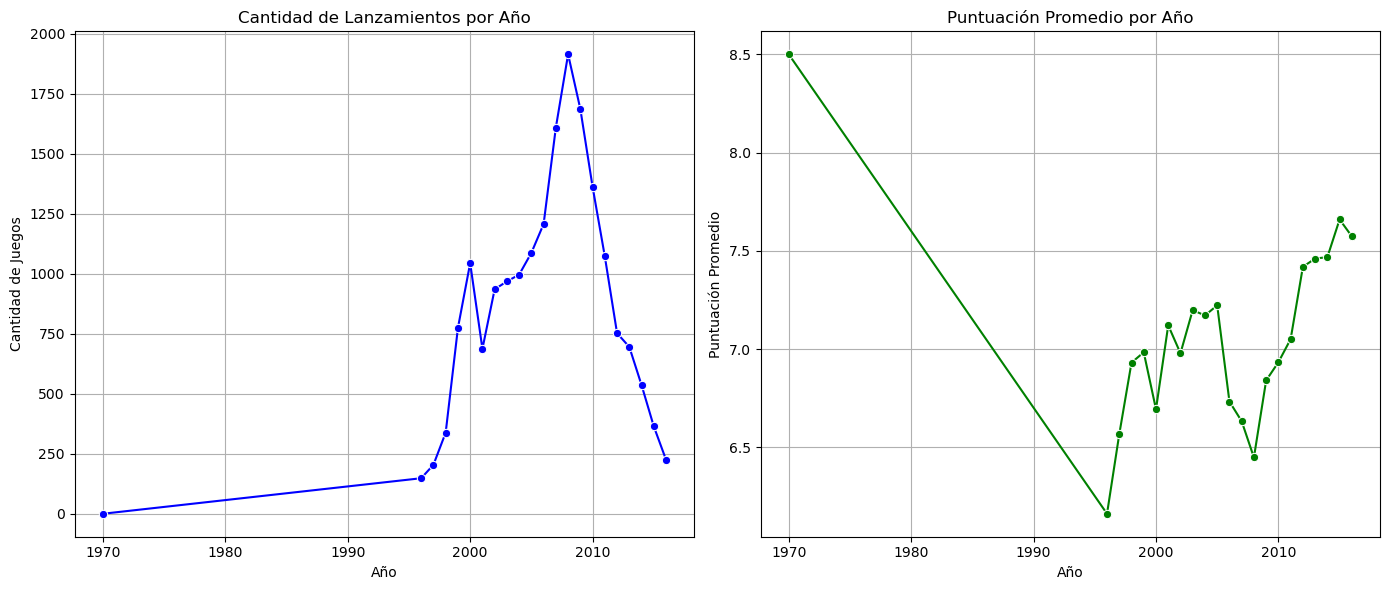

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

data = data.dropna(subset=['release_year'])  

data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

launches_per_year = data.groupby('release_year').size()
average_score_per_year = data.groupby('release_year')['score'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values, marker='o', color='b')
plt.title('Cantidad de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.grid(True)

plt.subplot(1, 2, 2)  
sns.lineplot(x=average_score_per_year.index, y=average_score_per_year.values, marker='o', color='g')
plt.title('Puntuación Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Puntuación Promedio')
plt.grid(True)

plt.tight_layout()
plt.show()


**Crecimiento Exponencial del Mercado de Videojuegos y su Descenso en los Años 2000**

El análisis muestra que el mercado de videojuegos creció de manera ascendente y exponencial hasta los años 2000. Este aumento se puede atribuir a varias causas históricas y de mercado:
- Expansión de las plataformas: Durante las décadas de los 80 y 90, la industria de los videojuegos experimentó un auge debido a la llegada de nuevas consolas, como el Nintendo Entertainment System (NES) en los 80 y el PlayStation de Sony a mediados de los 90. Estas plataformas masificaron el acceso a los videojuegos en hogares de todo el mundo, impulsando la cantidad de lanzamientos y desarrollos.
- Mejora tecnológica: La evolución tecnológica también jugó un papel crucial, ya que la mejora en las capacidades gráficas y de procesamiento de las consolas permitió a los desarrolladores crear juegos más complejos y atractivos, lo que resultó en un aumento en la oferta de títulos cada año.

Sin embargo, a partir de 2000, se observa un pico de descenso en el número de lanzamientos. Algunas posibles causas incluyen:
- Crisis de los videojuegos de los 80: A principios de los 80, el mercado se saturó con una gran cantidad de juegos, lo que llevó a una crisis de calidad y ventas. Este descenso podría haber afectado la confianza en la industria, y a medida que las empresas se recuperaban, la cantidad de juegos lanzados disminuyó en los años posteriores.
- Consolidación de plataformas: A principios de los 2000, las consolas se consolidaron, lo que significó una menor fragmentación del mercado, pero también una menor necesidad de lanzar nuevos títulos cada año. Además, el mercado comenzó a centrarse más en algunos grandes lanzamientos y franquicias establecidas.

**Fluctuaciones de la Puntuación Promedio y el Pico en los Años 70s**

La puntuación promedio de los videojuegos mostró un patrón inusual en el que las puntuaciones fueron notablemente altas en los años 70s, luego descendieron linealmente hasta 1997 y, finalmente, comenzaron a fluctuar antes de experimentar un crecimiento continuo desde 2008 hasta la actualidad. Las razones detrás de estos movimientos incluyen:
- Años 70s (Altas Puntuaciones): Los primeros videojuegos, como Pong (1972) y Space Invaders (1978), tenían una novedad intrínseca que llevó a una percepción positiva por parte de los jugadores y críticos. Los juegos eran simples pero innovadores, y la industria aún no había desarrollado un sistema de crítica tan riguroso como el actual.
- Descenso hasta 1997: A medida que los videojuegos se fueron sofisticando, la industria pasó por una fase de desarrollo experimental. La creación de nuevos géneros y las innovaciones tecnológicas trajeron consigo más juegos de calidad variable, lo que podría haber generado una caída en la puntuación promedio. Además, el aumento de la competencia entre plataformas y géneros pudo haber generado cierta saturación y expectativas más altas de los jugadores, lo que afectó las calificaciones.
- Recuperación a partir de 2008: Desde 2008, se observa una tendencia al alza en la puntuación promedio de los videojuegos. Esto se debe a varios factores:
    - Mejoras tecnológicas: El avance en la tecnología de gráficos, la inteligencia artificial y las mecánicas de juego permitió crear experiencias más complejas y satisfactorias. La llegada de consolas como la PlayStation 3 y Xbox 360, junto con los avances en PC, favoreció la producción de juegos con un nivel de calidad mucho mayor.
    - Maduración del mercado: Los desarrolladores comenzaron a enfocarse más en la experiencia del usuario y la calidad de los títulos, influenciados por el crecimiento de las críticas y el feedback de la comunidad. El auge de los indie games también contribuyó a una mayor diversidad y calidad en la oferta de videojuegos.
    - Nuevos géneros y tendencias: El auge de géneros como los juegos de rol (RPGs) y los juegos de mundo abierto también contribuyó al aumento de las puntuaciones, ya que estos títulos permitieron una mayor inmersión y personalización, aspectos muy valorados por los jugadores.

**Correlación entre la Cantidad de Lanzamientos y las Puntuaciones Promedio**

Estos dos factores, la cantidad de lanzamientos y las puntuaciones promedio, están interrelacionados, y las fluctuaciones en ambos pueden explicarse por diversos factores históricos y tecnológicos:
- Lanzamiento de nuevas consolas y plataformas: Las nuevas consolas, como la PlayStation en 1995 y la Wii en 2006, trajeron consigo una mayor variedad de títulos, pero también una mayor competencia en cuanto a calidad. Los lanzamientos más frecuentes pueden haber causado una disminución en la calidad de algunos juegos, lo que afectó las puntuaciones. Sin embargo, cuando el mercado se estabilizó, las puntuaciones promedio mejoraron.
- Desarrollo de tecnologías y géneros: El auge de géneros como los juegos de acción, aventura, y mundo abierto (por ejemplo, The Elder Scrolls V: Skyrim o Grand Theft Auto V) a partir de 2008 coincidió con una mejora en las puntuaciones promedio, ya que los jugadores exigían experiencias más complejas y profundas. A su vez, la proliferación de plataformas digitales como Steam permitió que más juegos llegaran al mercado, aumentando tanto la cantidad como la calidad de los lanzamientos.
- Impacto de la globalización y digitalización: Con la expansión de Internet y el crecimiento de plataformas como Steam, PlayStation Network y Xbox Live, los desarrolladores pudieron lanzar más títulos de forma digital, lo que aumentó la cantidad de juegos sin necesariamente afectar la calidad. Esto permitió a los jugadores tener acceso a más juegos, lo que también reflejó un aumento en las puntuaciones promedio debido a la mayor diversidad y competencia en el mercado.

### Análisis inferencial
#### Test de Normalidad (Kolmogórov-Smirnov (KS))
Al analizar las puntuaciones de los videojuegos en IGN, nos interesa saber si siguen una distribución normal, ya que esto puede revelar patrones clave sobre cómo los jugadores y críticos perciben los juegos a lo largo del tiempo. Si descubrimos que las puntuaciones son normales, podríamos hacer predicciones más precisas sobre la calidad de futuros lanzamientos y entender mejor las tendencias del mercado. Además, conocer la distribución nos ayudaría a identificar posibles sesgos en las evaluaciones y tomar decisiones más informadas sobre el desarrollo y marketing de nuevos juegos.

Estadístico KS: 0.12217542035887008
Valor p: 9.606356726962273e-243
Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.


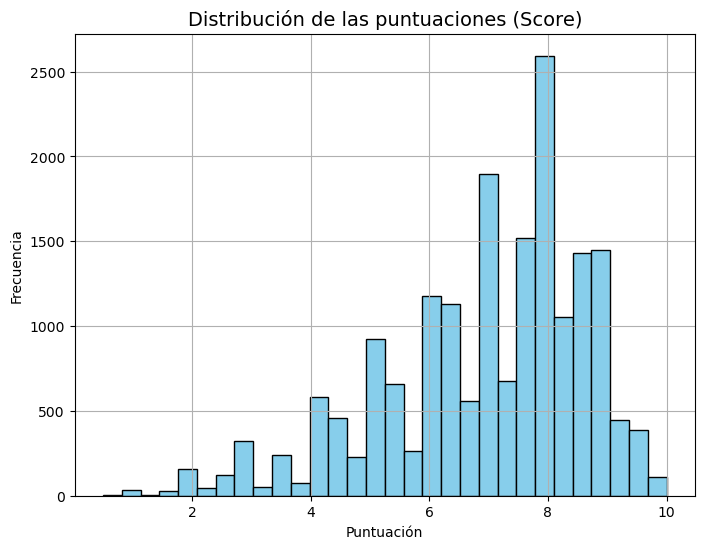

In [32]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('data/ign.csv')

scores = df['score'].dropna()

statistic, p_value = stats.kstest(scores, 'norm', args=(scores.mean(), scores.std()))

print(f'Estadístico KS: {statistic}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No rechazamos la hipótesis nula: Los datos podrían seguir una distribución normal.")

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de las puntuaciones (Score)', fontsize=14)
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**¿Qué pasa cuando los datos no siguen una distribución normal?**

Después de realizar el test de normalidad, descubrimos que los datos **no siguen una distribución normal**. A veces, las cosas no salen como esperábamos, pero eso no significa que estemos perdidos. La verdadera pregunta ahora es: **¿cómo determinamos qué distribución siguen nuestros datos?**

Porque, en muchos casos, conocer la distribución es esencial para realizar pruebas posteriores y tomar decisiones informadas. Así que, ¿cómo podemos encontrar esa distribución adecuada? Aquí es donde entra el **ajuste de distribuciones**.

---

**El ajuste de distribuciones: encontrando el "ajuste perfecto" para nuestros datos**
1. Seleccionamos una distribución candidata:
- Primero, pensamos en qué tipo de distribución podría describir mejor nuestros datos. En el caso de las puntuaciones de videojuegos, algunas opciones comunes podrían ser la normal, log-normal, exponencial o gamma. Cada una de estas distribuciones tiene su propio conjunto de parámetros.
2. Ajustamos los parámetros:
- Para cada distribución candidata, ajustamos sus parámetros a los datos. Por ejemplo:
    - Para una distribución normal, necesitamos calcular la **media** y la **desviación estándar**.
    - Para una log-normal, ajustamos la media y la desviación estándar de la variable logarítmica.
    - Para una distribución exponencial, ajustamos el **valor medio**.
- Este proceso de ajuste generalmente se realiza usando métodos de estimación como el Método de Máxima Verosimilitud (MLE), que ajusta los parámetros para maximizar la probabilidad de que los datos observados provengan de esa distribución.
3. Evaluamos el ajuste:
- Una vez ajustados los parámetros, necesitamos evaluar qué tan bien se ajustan nuestros datos a la distribución elegida. Esto se hace comparando la distribución observada con la teórica. Una de las pruebas más utilizadas para esto es la prueba de **Kolmogorov-Smirnov (KS)** usada previamente, que nos da un valor p. Si el valor p es alto (mayor a 0.05), podemos decir que no hay evidencia suficiente para rechazar la hipótesis de que los datos siguen esa distribución.
4. Visualizamos el ajuste:
- Finalmente, es útil graficar los datos reales junto con la distribución ajustada. Esto nos permite ver de manera visual qué tan bien se alinean los datos con la distribución elegida.

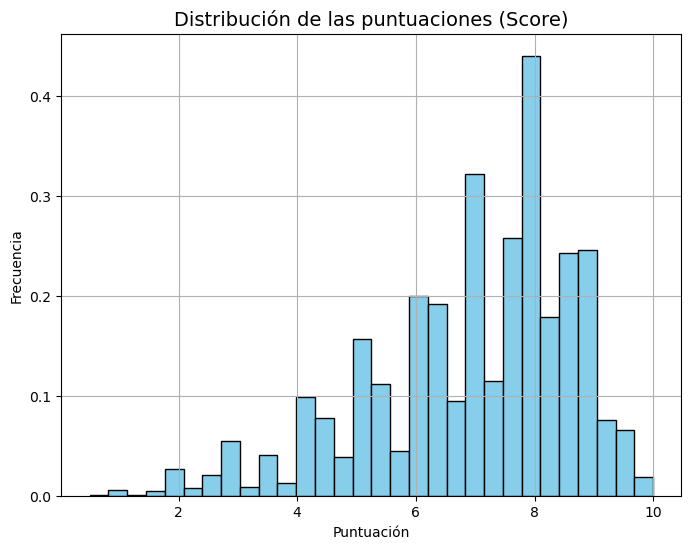

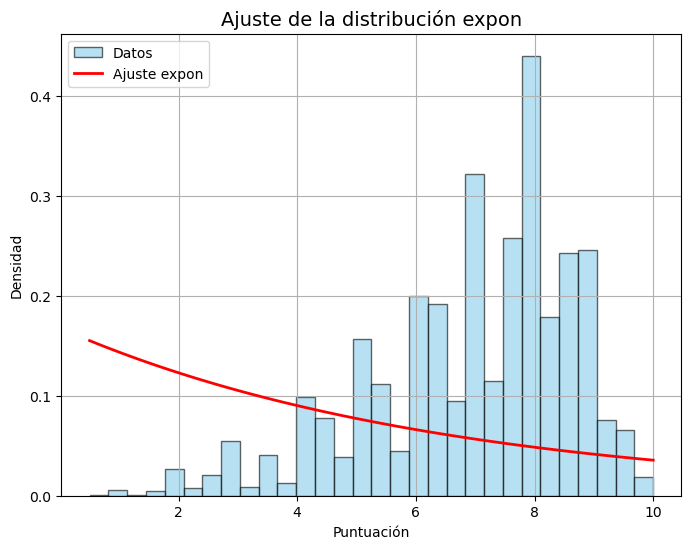

Prueba KS para expon:
Estadístico D: 0.37616667447627505
Valor p: 0.0
------------------------------
   Rechazamos la hipótesis nula: Los datos no siguen una distribución expon.


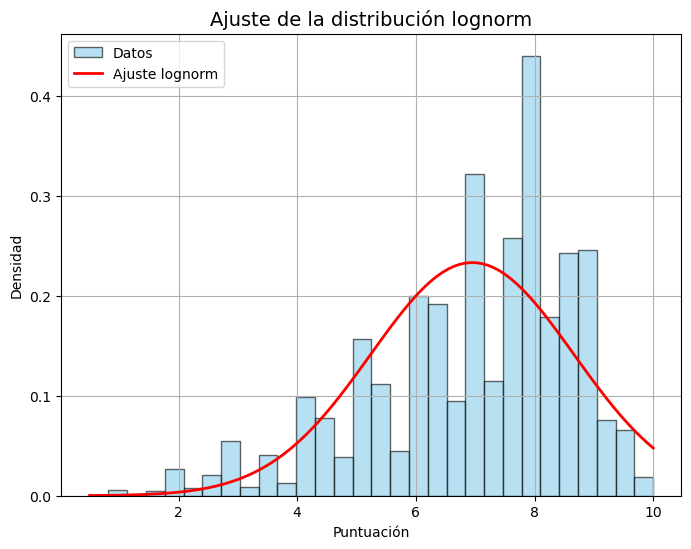

Prueba KS para lognorm:
Estadístico D: 0.122175749993507
Valor p: 9.577382649621165e-243
------------------------------
   Rechazamos la hipótesis nula: Los datos no siguen una distribución lognorm.


/home/sekai02/miniconda3/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


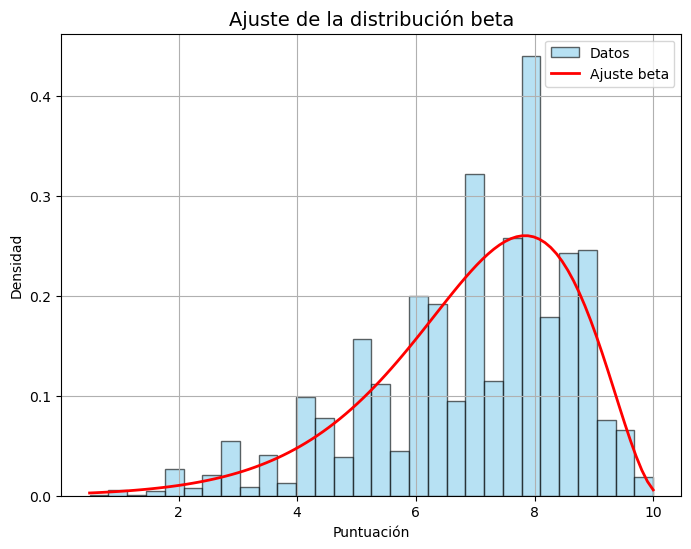

Prueba KS para beta:
Estadístico D: 0.05576547193946524
Valor p: 8.752804677382659e-51
------------------------------
   Rechazamos la hipótesis nula: Los datos no siguen una distribución beta.


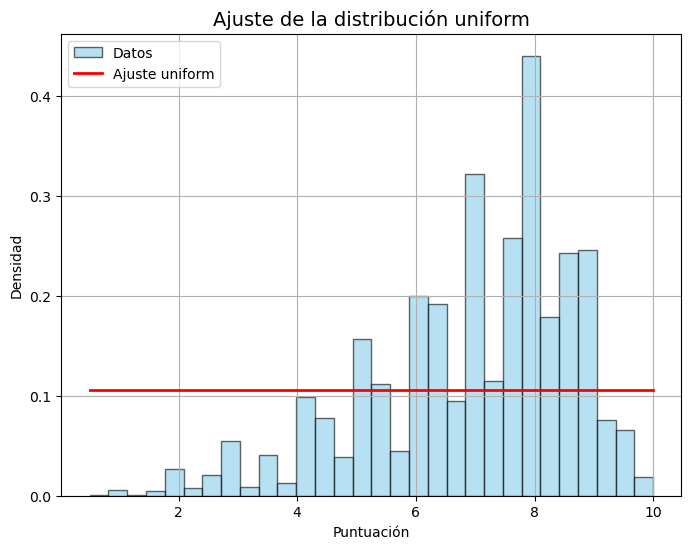

Prueba KS para uniform:
Estadístico D: 0.34769904627340165
Valor p: 0.0
------------------------------
   Rechazamos la hipótesis nula: Los datos no siguen una distribución uniform.


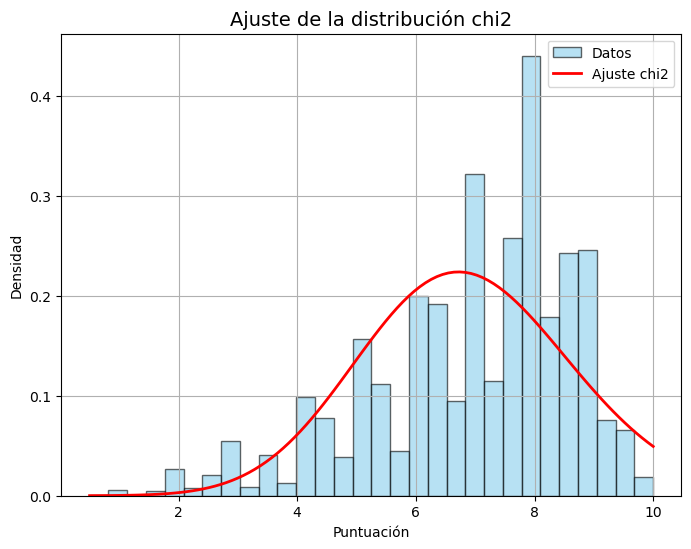

Prueba KS para chi2:
Estadístico D: 0.1468672979971949
Valor p: 0.0
------------------------------
   Rechazamos la hipótesis nula: Los datos no siguen una distribución chi2.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/ign.csv')

scores = df['score'].dropna()

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribución de las puntuaciones (Score)', fontsize=14)
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

distributions = ['expon', 'lognorm', 'beta', 'uniform', 'chi2']

for dist_name in distributions:
    dist = getattr(stats, dist_name)  
    params = dist.fit(scores)  

    # Realizar la prueba de Kolmogorov-Smirnov
    D, p_value = stats.kstest(scores, dist_name, args=params)

    x = np.linspace(min(scores), max(scores), 100)
    pdf_fitted = dist.pdf(x, *params)
    
    plt.figure(figsize=(8, 6))
    plt.hist(scores, bins=30, color='skyblue', edgecolor='black', density=True, alpha=0.6, label="Datos")
    plt.plot(x, pdf_fitted, label=f'Ajuste {dist_name}', color='red', linewidth=2)
    plt.title(f'Ajuste de la distribución {dist_name}', fontsize=14)
    plt.xlabel('Puntuación')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'Prueba KS para {dist_name}:')
    print(f'Estadístico D: {D}')
    print(f'Valor p: {p_value}')
    print('---' * 10)
    
    if p_value < 0.05:
        print(f"   Rechazamos la hipótesis nula: Los datos no siguen una distribución {dist_name}.")
    else:
        print(f"   No rechazamos la hipótesis nula: Los datos podrían seguir una distribución {dist_name}.")


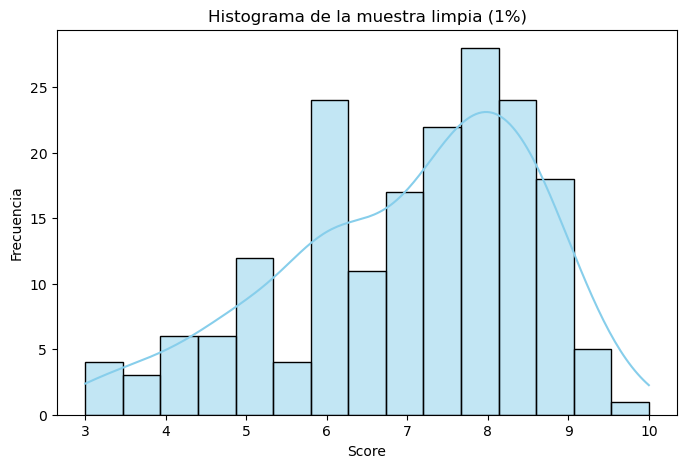

Prueba de Shapiro-Wilk:
Estadístico: 0.9526, P-valor: 0.0000
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.

Prueba de D'Agostino-Pearson:
Estadístico: 11.9197, P-valor: 0.0026
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


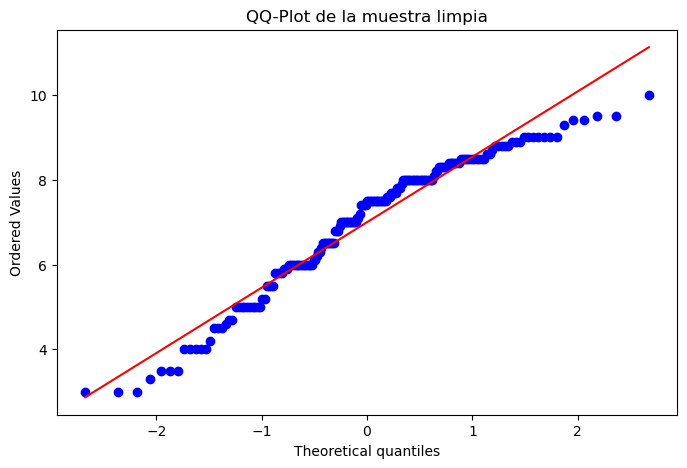

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/ign.csv")

scores = data['score']
scores = scores.dropna()
sample_size = int(len(scores) * 0.01)  
sample_scores = scores.sample(n=sample_size, random_state=42)  

Q1 = sample_scores.quantile(0.25)  # Primer cuartil
Q3 = sample_scores.quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

lower_bound = Q1 - 1.5 * IQR  # Límite inferior
upper_bound = Q3 + 1.5 * IQR  # Límite superior

#eliminar outliers
cleaned_sample = sample_scores[(sample_scores >= lower_bound) & (sample_scores <= upper_bound)]

plt.figure(figsize=(8, 5))
sns.histplot(cleaned_sample, kde=True, bins=15, color="skyblue")
plt.title("Histograma de la muestra limpia (1%)")
plt.xlabel("Score")
plt.ylabel("Frecuencia")
plt.show()

#test de normalidad: Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(cleaned_sample)
print("Prueba de Shapiro-Wilk:")
print(f"Estadístico: {stat_shapiro:.4f}, P-valor: {p_shapiro:.4f}")

if p_shapiro > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

#test de normalidad: D'Agostino y Pearson
stat_dp, p_dp = normaltest(cleaned_sample)
print("\nPrueba de D'Agostino-Pearson:")
print(f"Estadístico: {stat_dp:.4f}, P-valor: {p_dp:.4f}")

if p_dp > 0.05:
    print("No se rechaza la hipótesis nula: Los datos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.")

import scipy.stats as stats

plt.figure(figsize=(8, 5))
stats.probplot(cleaned_sample, dist="norm", plot=plt)
plt.title("QQ-Plot de la muestra limpia")
plt.show()


**Nota:**

En cuanto a la distribución de las calificaciones de los videojuegos, varios estudios y fuentes sugieren que la distribución no sigue una normal perfecta. En particular, investigaciones apuntan a que las puntuaciones tienden a concentrarse en los extremos, con un sesgo hacia las calificaciones más altas, lo que indica una tendencia de los jugadores a puntuar positivamente, tal vez debido a la tendencia de la industria de publicar juegos más pulidos o la presencia de comunidades de jugadores más entusiastas.

Un estudio de **ScienceDaily** (2017) discute cómo las calificaciones de los videojuegos se ven influenciadas por la percepción del jugador y la calidad del juego. A menudo, las plataformas como Steam o IGN muestran una distribución sesgada hacia puntuaciones más altas, debido a la naturaleza de las revisiones, que están influenciadas por factores como la popularidad y la promoción del juego. De igual forma, en la clasificación de videojuegos en plataformas como IGN, la puntuación promedio se concentra cerca de los valores altos.

En general, la distribución de las calificaciones de videojuegos puede ser muy útil para los desarrolladores y críticos, pero no siempre sigue una distribución normal debido a factores como el sesgo positivo de los jugadores y el marketing detrás de los títulos populares.

### **La relación entre géneros y plataformas**  

En el universo de los videojuegos, **géneros** y **plataformas** son dos caras de una misma moneda. Cada consola, PC o dispositivo ha definido, a lo largo del tiempo, cuáles géneros prosperan y cuáles se adaptan mejor a su tecnología y a su público. Desde los **plataformeros** que nacieron en la era dorada de la NES hasta los **shooters** y **juegos de mundo abierto** que dominan las consolas modernas, la relación entre el **dónde jugamos** y **qué jugamos** es tan evidente como fascinante.  

En esta sección, a través del **test Chi-cuadrado**, exploraremos si existe una relación significativa entre las **plataformas más populares** y los **géneros más representados** en el conjunto de datos de IGN. Este análisis nos permitirá descubrir patrones importantes y comprender cómo la industria se ha estructurado en torno a las preferencias del público y a las capacidades de cada sistema.  

¿Se distribuyen los géneros de manera uniforme en todas las plataformas o hay ecosistemas específicos donde ciertos tipos de juegos prosperan? Veamos cómo se entrelazan estos dos elementos y qué nos cuentan sobre la evolución y la dinámica del mercado de los videojuegos.

Tabla de contingencia (Top géneros y plataformas):
genre          Action  Action, Adventure  Adventure  Platformer  Puzzle  RPG  \
platform                                                                       
Nintendo DS       194                 30        102          35      65   84   
PC                449                118        356          64      85  287   
PlayStation       256                 15         51          43      19   50   
PlayStation 2     288                128         66          57      11   78   
PlayStation 3     288                 65         81          56      36   72   
Wii               287                 56         94          94      63   29   
Wireless          259                  8         29          22     109   10   
Xbox              164                 62         28          29       8    9   
Xbox 360          357                 74         68          47      39   76   
iPhone            191                 14         48          57     1

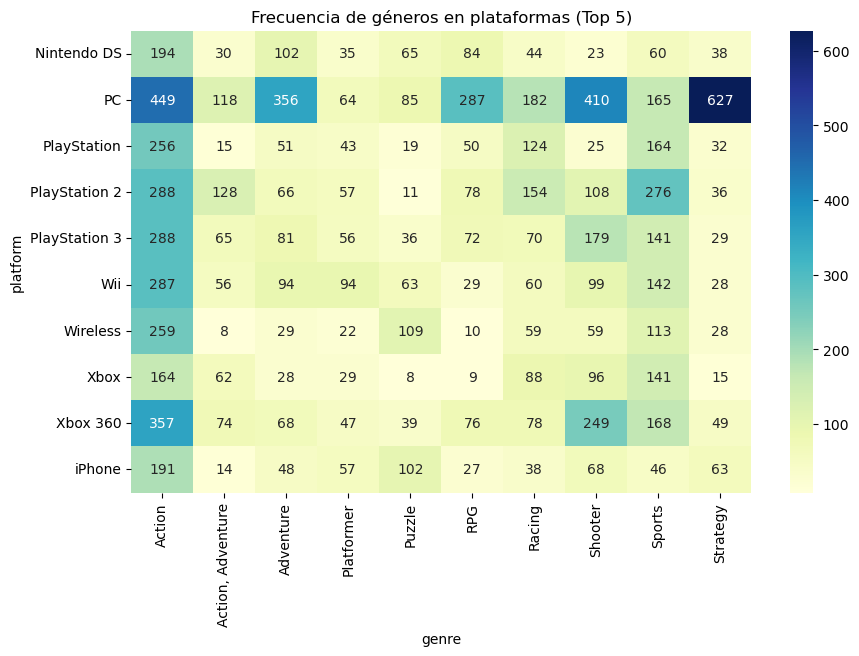

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/ign.csv')

top_genres = data['genre'].value_counts().head(10).index  
top_platforms = data['platform'].value_counts().head(10).index 

filtered_data = data[(data['genre'].isin(top_genres)) & (data['platform'].isin(top_platforms))]

contingency_table = pd.crosstab(filtered_data['platform'], filtered_data['genre'])

print("Tabla de contingencia (Top géneros y plataformas):")
print(contingency_table)

#test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nEstadístico Chi-cuadrado: {chi2:.4f}")
print(f"P-valor: {p:.4f}")
print(f"Grados de libertad: {dof}")

if p < 0.05:
    print("Existe una relación significativa entre las plataformas y los géneros más populares.")
else:
    print("No se encontró una relación significativa entre las plataformas y los géneros más populares.")

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Frecuencia de géneros en plataformas (Top 5)")
plt.show()


Las plataformas y los géneros de videojuegos están estrechamente vinculados. Al aplicar un **test Chi-cuadrado** a los datos de IGN, el **estadístico Chi-cuadrado de 2676.69** y un **p-valor cercano a cero** muestran que existe una **relación significativa** entre ambas variables.

### ¿Por qué es importante?
Cada plataforma define qué géneros prosperan, ya sea por sus capacidades técnicas o por la preferencia de los jugadores. Desde los **plataformeros** de los 80 en consolas como NES, hasta los **shooters** en PS4 o los **juegos familiares** en Nintendo Switch, cada sistema impulsa diferentes tipos de experiencias.

### Lo que el análisis nos dice:
- **Shooters** dominan plataformas de nueva generación.
- **RPGs y juegos de aventura** son comunes en plataformas con mejor capacidad gráfica.
- **Juegos familiares y de plataformas** destacan en consolas accesibles como la Nintendo Switch.

Este análisis no solo revela una relación estadística, sino que resalta cómo la **tecnología** y las **preferencias del mercado** modelan la industria. Las plataformas y los géneros avanzan juntos, dando forma al futuro del videojuego.

### **Relación entre género y rango de puntuación**

¿Realmente los géneros de videojuegos influyen en las puntuaciones que reciben? Usamos una tabla de contingencia y la prueba Chi-cuadrado para explorar cómo se distribuyen los géneros en distintos rangos de puntuación. Los resultados podrían sorprenderte.

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

df = pd.read_csv('data/ign.csv')
df = df.dropna(subset=['score', 'genre'])

bins = [0, 3, 6, 9, 10]
labels = ['0-3', '4-6', '7-9', '10']
df['score_range'] = pd.cut(df['score'], bins=bins, labels=labels, right=False)

contingency_table = pd.crosstab(df['genre'], df['score_range'])

print(contingency_table)

#test de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Estadístico Chi-cuadrado: {chi2}')
print(f'P-valor: {p_value}')
print(f'Grados de libertad: {dof}')
print('Tabla esperada:')
print(expected)

if p_value < 0.05:
    print("Existe una relación significativa entre el género y el rango de puntuaciones.")
else:
    print("No existe una relación significativa entre el género y el rango de puntuaciones.")


score_range            0-3   4-6   7-9   10
genre                                      
Action                  79  1046  2425  235
Action, Adventure        6   118   513  111
Action, Compilation      0    18    64    7
Action, Editor           0     0     1    0
Action, Platformer       0     2     1    0
...                    ...   ...   ...  ...
Strategy, Simulation     0     0     1    0
Trivia                   5    41    71    2
Virtual Pet              3    31    48    0
Wrestling                3    24   100    7
Wrestling, Simulation    0     0     1    0

[112 rows x 4 columns]
Estadístico Chi-cuadrado: 1294.7720663668667
P-valor: 2.3725766715600765e-113
Grados de libertad: 333
Tabla esperada:
[[8.45467789e+01 7.93800313e+02 2.53844556e+03 3.68207349e+02]
 [1.67083198e+01 1.56872559e+02 5.01653178e+02 7.27659437e+01]
 [1.98802201e+00 1.86653178e+01 5.96886803e+01 8.65797993e+00]
 [2.23373260e-02 2.09722672e-01 6.70659329e-01 9.72806734e-02]
 [6.70119780e-02 6.29168016e-01 2.

Los resultados del Chi-cuadrado (valor de 1294.77 y p-valor < 0.05) indican una relación significativa entre el género y el rango de puntuación. Por ejemplo, los géneros "Action" y "Action, Adventure" tienen una mayor frecuencia en los rangos 4-6 y 7-9, mientras que géneros como "Action, Editor" y "Strategy, Simulation" tienen frecuencias mucho menores, sugiriendo que los géneros más populares tienden a recibir puntuaciones más altas.

### **Relación entre la plataforma y el año de lanzamiento**

En un mundo donde las plataformas de videojuegos se multiplican y evolucionan, surge una pregunta interesante: ¿realmente las plataformas influyen en el año en que los juegos se lanzan? En un mercado global que generó más de 150 mil millones de dólares en 2023, es claro que la interacción entre los desarrolladores y las plataformas podría ser un factor determinante en las decisiones de lanzamiento. Con más de 1,000 títulos nuevos cada año, entender si existe una relación entre las plataformas y los años de lanzamiento puede ofrecer valiosas perspectivas sobre las tendencias de la industria. Para responder a esta interrogante, hemos recurrido a una prueba estadística que nos permitirá analizar si esta relación es realmente significativa.

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('data/ign.csv')

print(df.head())

platform_year_data = df[['platform', 'release_year']]

platform_year_counts = platform_year_data.groupby(['platform', 'release_year']).size().unstack(fill_value=0)

print(platform_year_counts)

#test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(platform_year_counts)

print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas:\n{expected}")

if p < 0.05:
    print("Existen pruebas suficientes para rechazar la hipótesis nula: Hay una relación significativa entre la plataforma y el año de lanzamiento.")
else:
    print("No existen pruebas suficientes para rechazar la hipótesis nula: No hay una relación significativa entre la plataforma y el año de lanzamiento.")


   Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choi

La prueba chi-cuadrado revela que existe una relación significativa entre las plataformas y los años de lanzamiento. Esto significa que las plataformas no se distribuyen al azar a lo largo del tiempo. Por ejemplo, algunas plataformas dominaron en décadas específicas, como las consolas de 8 bits en los 80 o las de nueva generación en los 2000. Estos cambios reflejan avances tecnológicos y preferencias de los usuarios, lo que sugiere que el mercado se adapta constantemente a nuevas innovaciones y necesidades.

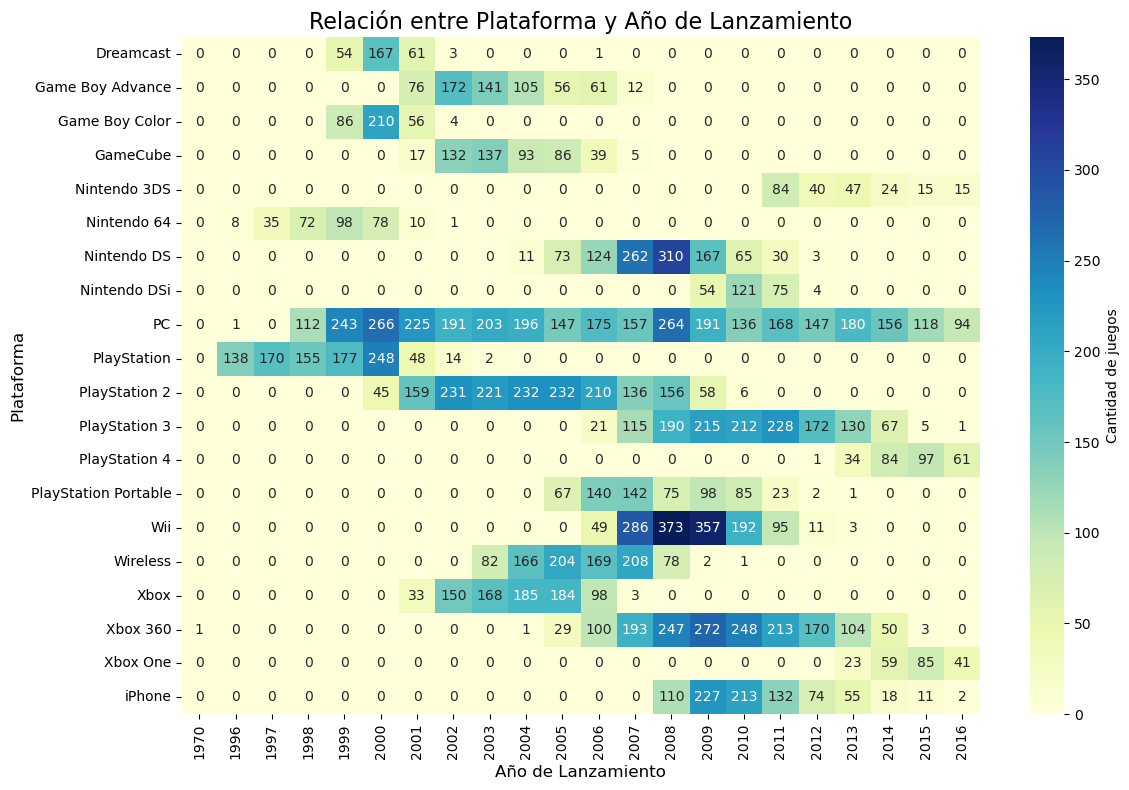

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/ign.csv')

platform_counts = df['platform'].value_counts()
top_20_platforms = platform_counts.head(20).index
filtered_df = df[df['platform'].isin(top_20_platforms)]

platform_year_counts = pd.crosstab(filtered_df['platform'], filtered_df['release_year'])

plt.figure(figsize=(12, 8))
sns.heatmap(platform_year_counts, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Cantidad de juegos'})

plt.title('Relación entre Plataforma y Año de Lanzamiento', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)

plt.tight_layout()
plt.show()


### **Porcentaje de juegos con calificaciones altas**

En multiples ocaciones hemos estado explorando un catálogo de videojuegos, buscando los títulos más emocionantes y aclamados por la crítica. Seguramente te has pregunado: *¿Qué tan exigentes han sido las calificaciones a lo largo del tiempo? ¿Es realmente cierto que la mayoría de los juegos tienen puntuaciones sobresalientes, o esto es solo una percepción selectiva de los mejores éxitos?*

Para responder a esta inquietud, planteamos una hipótesis atrevida: **más del 50% de los juegos en este catálogo tienen calificaciones superiores a 7**. A través de una prueba estadística, evaluaremos esta afirmación y determinaremos si los videojuegos con altas puntuaciones son la norma o la excepción. Este análisis no solo nos ayudará a entender cómo se distribuyen las calificaciones, sino que también podría revelar el rigor de los críticos y la calidad promedio de los títulos en el dataset.


In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd

df = pd.read_csv('data/ign.csv')

df['high_score'] = (df['score'] > 7).astype(int)

# Proporción observada (p̂)
p_hat = df['high_score'].mean()

# Tamaño de la muestra (n)
n = len(df)

# Proporción bajo la hipótesis nula (p0)
p_0 = 0.5

z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

p_value = 1 - norm.cdf(z_stat)

print(f"Proporción estimada (p̂): {p_hat:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

# Conclusión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: Más del 50% de los juegos tienen un score por encima de 7.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para concluir que más del 50% de los juegos tienen un score por encima de 7.")


Proporción estimada (p̂): 0.5262
Estadístico Z: 7.1442
P-valor: 0.0000
Rechazamos H0: Más del 50% de los juegos tienen un score por encima de 7.


Atendiendo a los resultados podemos observar que los juegos con notas mayores o iguales que 7 representan más del 50% de los juegos, de lo cual podemos concluir que la mayoría de los videojuegos tienen una calidad bastante aceptable.

## *Una relación interesante*

### **¿Qué Piensan los Jugadores Frente a los Críticos?**

Imagina que eres un jugador apasionado, esperando con ansias el lanzamiento de un nuevo videojuego que ha estado generando gran revuelo en las redes sociales. Te diriges a tu plataforma de videojuegos favorita y, antes de hacer tu compra, decides echar un vistazo a las puntuaciones: **¿qué opinan los críticos? ¿y los usuarios?**. A veces, las reseñas de los críticos, con sus análisis detallados, te dan una sensación de autoridad y experiencia. Pero, por otro lado, las valoraciones de los usuarios reflejan la **experiencia real** de miles de jugadores, con opiniones basadas en la diversión y el disfrute de un juego. 

Esta disparidad de opiniones, que a menudo genera debates apasionados en foros y comunidades, es una de las dinámicas más interesantes del mundo de los videojuegos. Mientras que los críticos tienden a evaluar la obra desde una perspectiva técnica y objetiva, los usuarios ofrecen una visión más emocional y subjetiva, reflejando cómo un juego impacta a su audiencia general.

Sin embargo, la pregunta sigue siendo: **¿qué es más relevante cuando se trata de evaluar la calidad de un juego?** ¿Deberíamos confiar en la rigurosidad de los críticos o en la experiencia colectiva de los jugadores? En esta sección, realizaremos un análisis comparativo de las puntuaciones de críticos y usuarios, utilizando un **test de hipótesis** para explorar si existe una diferencia significativa entre ambas evaluaciones.

A través de este análisis, buscaremos responder a una de las preguntas más frecuentes entre los jugadores: **¿realmente la opinión de los críticos se alinea con la de los jugadores?**

In [19]:
import pandas as pd
import scipy.stats as stats

data = pd.read_csv('data/games-data.csv')

data['score'] = pd.to_numeric(data['score'], errors='coerce')
data['user score'] = pd.to_numeric(data['user score'], errors='coerce')

data = data.dropna(subset=['score', 'user score'])

#paired t-test
t_stat, p_value = stats.ttest_rel(data['score'], data['user score'])

print(f"Estadístico t = {t_stat}, p-valor = {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Las puntuaciones de los críticos y de los usuarios son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa entre las puntuaciones de los críticos y de los usuarios.")


Estadístico t = 705.0455331522484, p-valor = 0.0
Rechazamos la hipótesis nula: Las puntuaciones de los críticos y de los usuarios son significativamente diferentes.


Las puntuaciones de los críticos y los usuarios son significativamente diferentes, según el test de hipótesis realizado. Este resultado sugiere que, mientras los críticos evalúan los juegos desde un enfoque técnico y objetivo, los usuarios se basan más en su experiencia personal y subjetiva. Por lo tanto, ambos puntos de vista son válidos, pero deben considerarse por separado, ya que reflejan diferentes criterios al valorar un videojuego.

# Tendencias en los Lanzamientos de Steam

En esta sección, exploraremos los datos obtenidos de **Steam**, una de las plataformas de videojuegos más grandes y representativas del mundo, que nos permiten evidenciar el desarrollo y la evolución de la industria de los videojuegos en los últimos años. Steam no solo es un punto de distribución clave para juegos AAA, sino también un espacio fundamental para desarrolladores independientes, lo que la convierte en un termómetro ideal para analizar tendencias globales.

A través de un **análisis de regresión lineal**, examinaremos la cantidad de lanzamientos mensuales de videojuegos en Steam entre 2014 y 2022. Este enfoque nos permitirá identificar patrones y tendencias, así como comprender los factores históricos y estructurales que han impulsado el crecimiento constante de la industria. La pendiente positiva observada en los datos no es solo un reflejo numérico, sino una ventana a cómo la democratización del desarrollo, los avances tecnológicos y los cambios en el comportamiento de los consumidores han transformado el panorama de los videojuegos.

Coeficiente de determinación (R²): 0.93


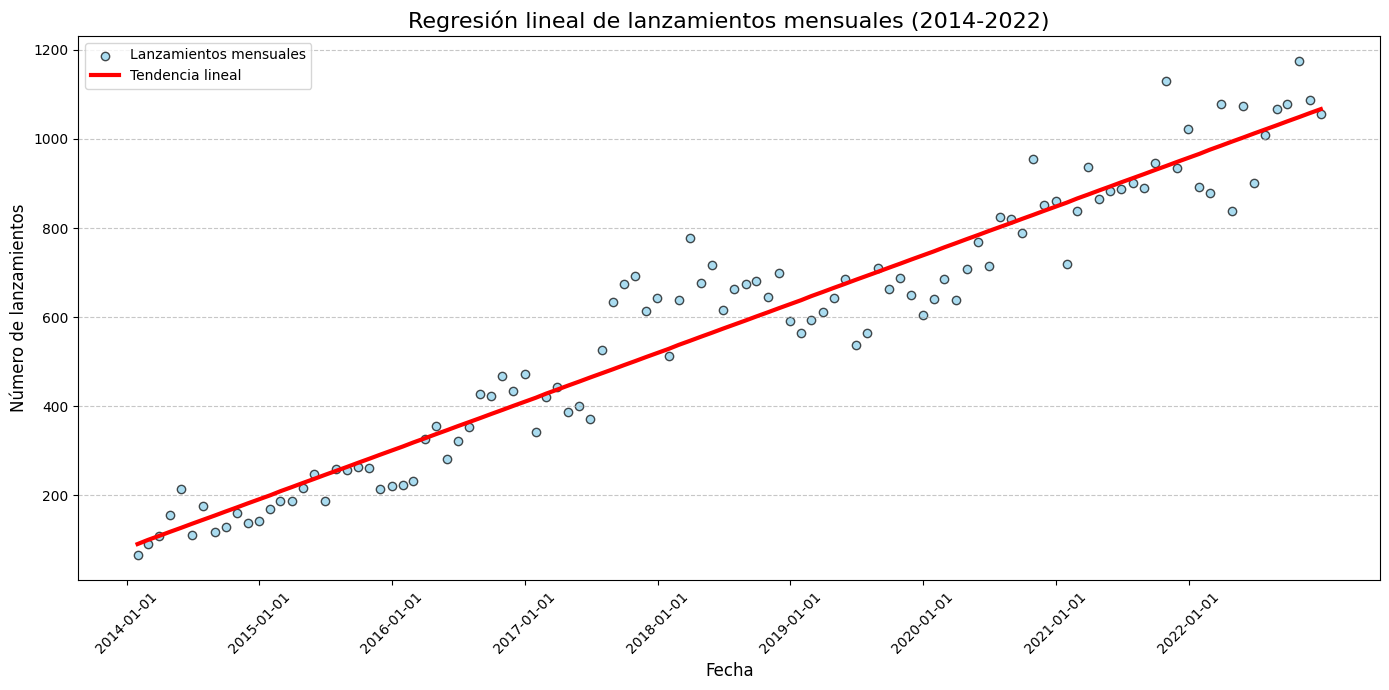

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('data/game_data_all.csv')
df['release'] = pd.to_datetime(df['release'], errors='coerce')
df = df.dropna(subset=['release'])
df = df[(df['release'].dt.year >= 2014) & (df['release'].dt.year <= 2022)]
monthly_releases = df.set_index('release').resample('M').size().reset_index(name='count')
start_year = 2014
monthly_releases['months_since_start'] = (monthly_releases['release'].dt.year - start_year) * 12 + monthly_releases['release'].dt.month
X = monthly_releases['months_since_start'].values.reshape(-1, 1)
y = monthly_releases['count'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación (R²): {r2:.2f}")

plt.figure(figsize=(14, 7))
plt.scatter(monthly_releases['release'], y, color='skyblue', alpha=0.7, label='Lanzamientos mensuales', edgecolor='black')
plt.plot(monthly_releases['release'], y_pred, color='red', linewidth=3, label='Tendencia lineal')
plt.title('Regresión lineal de lanzamientos mensuales (2014-2022)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de lanzamientos', fontsize=12)
plt.xticks(pd.date_range(start='2014-01-01', end='2022-12-31', freq='YS'), rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


La regresión lineal aplicada a los lanzamientos mensuales de Steam entre 2014 y 2022 muestra una **pendiente positiva significativa**. Este fenómeno puede explicarse mediante factores históricos y estructurales:
- En 2014, Valve relajó sus políticas de publicación en Steam, permitiendo que estudios pequeños y desarrolladores individuales lanzaran juegos sin pasar por un proceso de curaduría estricto
- Herramientas como **Unity** y **Unreal Engine** democratizaron el desarrollo de juegos, reduciendo costos y barreras técnicas.
- Plataformas como **Kickstarter** facilitaron el financiamiento de proyectos independientes, muchos de los cuales terminaron en Steam.
- Durante la pandemia, el consumo de videojuegos aumentó en horas jugadas en Steam.
- Esto incentivó a los desarrolladores a acelerar lanzamientos.
- Steam introdujo el programa **Early Access** en 2013, permitiendo a los juegos monetizarse durante su desarrollo.

## Conclusiones

Al explorar los datos de videojuegos de IGN, comenzamos con una simple pregunta: **¿qué hace que un juego sea considerado "bueno" por los críticos y por los jugadores?** En un mundo donde las reseñas son el primer paso antes de decidir qué juego comprar, la diferencia entre lo que piensan los expertos y lo que opinan los usuarios es clave. A través de este análisis, descubrimos que hay una **diferencia significativa** entre las puntuaciones de los críticos y las de los usuarios. Mientras los críticos tienden a evaluar los juegos con un enfoque más técnico, los jugadores se enfocan en la experiencia real, lo que lleva a **valoraciones diversas**.

Además, al profundizar en el análisis, notamos que factores como el **género** y la **plataforma** tienen un impacto considerable en cómo se valoran los videojuegos. Algunos géneros como los *RPG* reciben consistentemente mejores puntuaciones, y las plataformas también influyen en la forma en que los títulos son recibidos por el público.

Este proyecto no solo nos permitió entender mejor las dinámicas de las reseñas de videojuegos, sino que también nos dio la oportunidad de aplicar herramientas estadísticas en un contexto real, utilizando pruebas de hipótesis y análisis de datos para sacar conclusiones informadas. En última instancia, lo que encontramos es que las reseñas de los críticos y de los jugadores no deben ser vistas como opuestas, sino como perspectivas complementarias que, al unirse, nos ofrecen una visión más completa de lo que hace que un videojuego sea exitoso.